In [2]:
from __future__ import print_function
import argparse, random, copy
import numpy as np
import os
import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from matplotlib import pyplot as plt
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision import transforms as T
from torch.optim.lr_scheduler import StepLR

import baseline

Matplotlib is building the font cache; this may take a moment.


In [5]:
device = torch.device("cuda")
train_dataset = baseline.CustomImageDataset('data/resized')
train_kwargs = {'batch_size': 3}
test_kwargs = {'batch_size': 1000}
train_loader = torch.utils.data.DataLoader(train_dataset, **train_kwargs)

model = baseline.SiameseNetwork().to(device)
model.load_state_dict(torch.load('siamese_network_label_0.pt'))

<All keys matched successfully>

In [6]:
loader = train_loader.__iter__()

In [7]:
im1, im2, tar = next(loader)

In [8]:
tar[0]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [9]:
im1[0][0].shape

torch.Size([256, 256])

In [10]:
im1, im2, tar = next(loader)

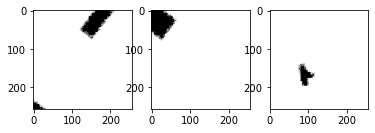

In [11]:
num = 2
# plt.subplot(1, 3, 1)
# narr = np.zeros((256, 256, 3))
# narr[...,0] = im1[num, 0, ...]
# narr[...,1] = im1[num, 1, ...]
# narr[...,2] = im1[num, 2, ...]
# plt.imshow(narr)
# plt.subplot(1, 3, 2)
# narr1 = np.zeros((256, 256, 3))
# narr1[...,0] = im2[num, 0, ...]
# narr1[...,1] = im2[num, 1, ...]
# narr1[...,2] = im2[num, 2, ...]
# plt.imshow(narr1)
plt.subplot(1, 3, 1)
plt.imshow(tar[0], cmap = 'Greys')
plt.subplot(1, 3, 2)
plt.imshow(tar[1], cmap = 'Greys')
plt.subplot(1, 3, 3)
plt.imshow(tar[num], cmap = 'Greys')


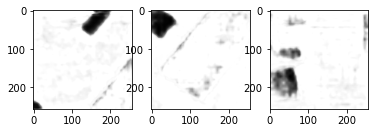

In [14]:
# plt.imshow(tar[num])
result = model(im1.to('cuda'), im2.to('cuda'))
plt.subplot(1, 3, 1)
plt.imshow(result[0][0].cpu().detach().numpy(), cmap = 'Greys')
plt.subplot(1, 3, 2)
plt.imshow(result[1][0].cpu().detach().numpy(), cmap = 'Greys')
plt.subplot(1, 3, 3)
plt.imshow(result[num][0].cpu().detach().numpy(), cmap = 'Greys')

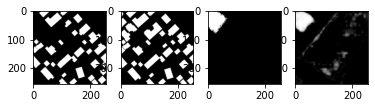

In [17]:
plt.subplot(1, 4, 1)
plt.imshow(cv2.imread('data/resized/2012/label/2012_label_10500_4500.jpg'), cmap = 'Greys_r')
plt.subplot(1, 4, 2)
plt.imshow(cv2.imread('data/resized/2016/label/2016_label_10500_4500.jpg'))
plt.subplot(1, 4, 3)
plt.imshow(tar[1], cmap = 'Greys_r')
plt.subplot(1, 4, 4)
plt.imshow(result[1][0].cpu().detach().numpy(), cmap = 'Greys_r')

In [15]:
from torchinfo import summary

In [16]:
summary(model, [(1, 3, 256, 256), (1, 3, 256, 256)])


Layer (type:depth-idx)                             Output Shape              Param #
SiameseNetwork                                     [1, 1, 256, 256]          --
├─FCN: 1-1                                         [1, 3, 256, 256]          --
│    └─IntermediateLayerGetter: 2-1                [1, 2048, 32, 32]         --
│    │    └─Conv2d: 3-1                            [1, 64, 128, 128]         9,408
│    │    └─BatchNorm2d: 3-2                       [1, 64, 128, 128]         128
│    │    └─ReLU: 3-3                              [1, 64, 128, 128]         --
│    │    └─MaxPool2d: 3-4                         [1, 64, 64, 64]           --
│    │    └─Sequential: 3-5                        [1, 256, 64, 64]          215,808
│    │    └─Sequential: 3-6                        [1, 512, 32, 32]          1,219,584
│    │    └─Sequential: 3-7                        [1, 1024, 32, 32]         7,098,368
│    │    └─Sequential: 3-8                        [1, 2048, 32, 32]         14,964,736
│   